In [1]:
from icevision.all import *

INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /home/dnth/.icevision/mmdetection_configs/mmdetection_configs-2.16.0/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


In [2]:
# from icevision.models.checkpoint import *
# checkpoint_path = 'models/model.pth'
# checkpoint_and_model = model_from_checkpoint(checkpoint_path, 
#     model_name='torchvision.retinanet', 
#     backbone_name='resnet50_fpn',
#     img_size=640, classes=classes)

# model = checkpoint_and_model["model"]
# model_type = checkpoint_and_model["model_type"]
# class_map = checkpoint_and_model["class_map"]

In [3]:
from icevision.models.checkpoint import *
checkpoint_path = 'models/model_checkpoint.pth'
checkpoint_and_model = model_from_checkpoint(checkpoint_path)

model = checkpoint_and_model["model"]
model_type = checkpoint_and_model["model_type"]
class_map = checkpoint_and_model["class_map"]

load checkpoint from local path: models/model_checkpoint.pth


In [4]:
# Transforms
img_size = checkpoint_and_model["img_size"]
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

/home/dnth/anaconda3/envs/asdf/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


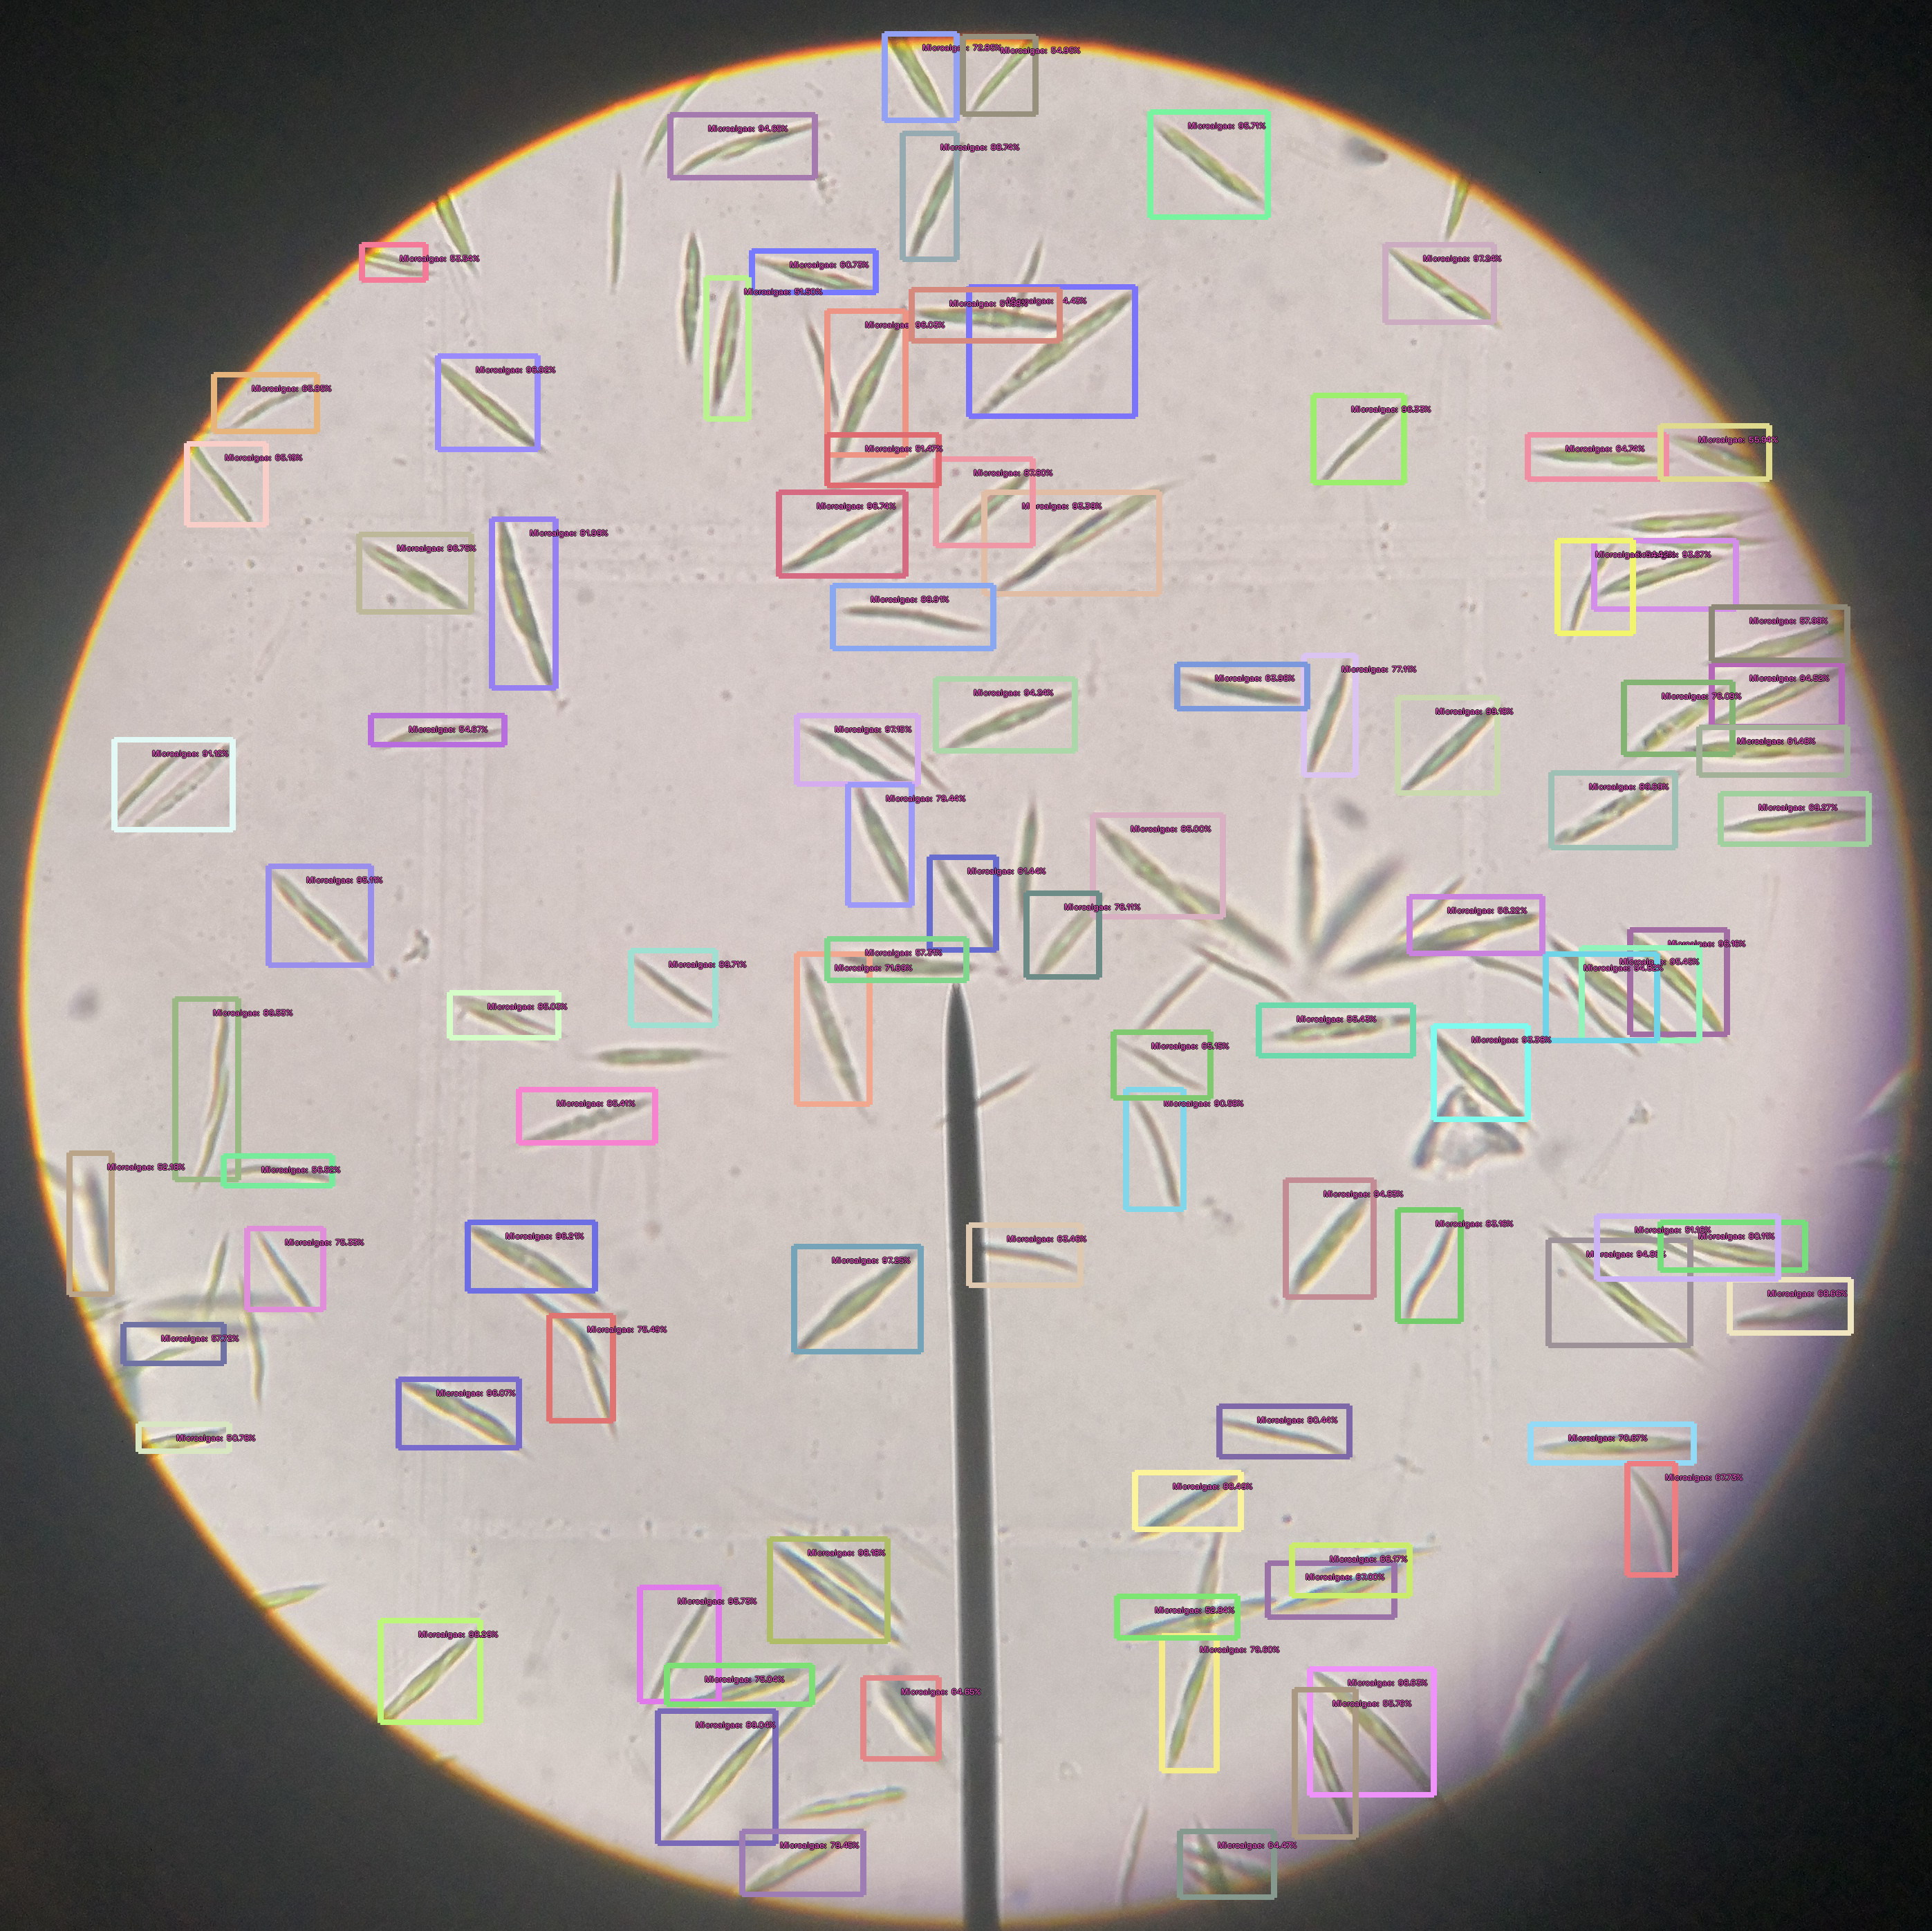

In [5]:
# Pick your images folder
path_to_image_folder = "./sample_images"
img_files = get_image_files(path_to_image_folder)
img = PIL.Image.open(img_files[-2])

pred_dict  = model_type.end2end_detect(img, valid_tfms, model, class_map=class_map, detection_threshold=0.5)
pred_dict['img']